In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from keras.datasets import cifar10
import matplotlib.pyplot as plt

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

print("training images shapes: ", x_train.shape)
print("testing images shapes: ", x_test.shape)
print("training targets shapes: ", y_train.shape)
print("testing targers shapes: ", y_test.shape)

cifar10_class = ['airplane', 'automobile', 'bird', 'cat','deer', 'dog', 'frog', 'horse', 'ship', 'truck']
print('Example training images and their labels: ' + str([x[0] for x in y_train[0:5]]))
print('Corresponding classes for the labels: ' + str([cifar10_class[x[0]] for x in y_train[0:5]]))

training images shapes:  (50000, 32, 32, 3)
testing images shapes:  (10000, 32, 32, 3)
training targets shapes:  (50000, 1)
testing targers shapes:  (10000, 1)
Example training images and their labels: [6, 9, 9, 4, 1]
Corresponding classes for the labels: ['frog', 'truck', 'truck', 'deer', 'automobile']


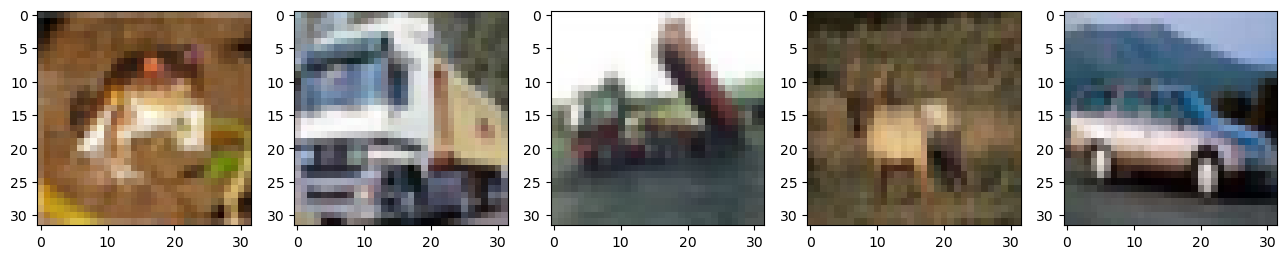

In [2]:
f, axarr = plt.subplots(1, 5)
f.set_size_inches(16, 6)

for i in range(5):
    img = x_train[i]
    axarr[i].imshow(img)
    
plt.show()

In [3]:
x_train = x_train.reshape(50000, 3072)
x_test = x_test.reshape(10000, 3072)

x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255
y_train = y_train % 2
y_test = y_test % 2

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(50000, 3072)
(10000, 3072)
(50000, 1)
(10000, 1)


# First attempt as tuning the model

In [5]:
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(3072,)))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()
history = model.fit(x_train, y_train, epochs=10, batch_size=28, validation_split=0.3)
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 512)               1573376   
                                                                 
 dense_5 (Dense)             (None, 256)               131328    
                                                                 
 dense_6 (Dense)             (None, 128)               32896     
                                                                 
 dense_7 (Dense)             (None, 1)                 129       
                                                                 
Total params: 1,737,729
Trainable params: 1,737,729
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
1250/1250 [==============================] - 29s 23ms/step - loss: 0.6296 - accuracy: 0.6401 - val_loss: 0.5960 - val_accuracy: 0.6749
Epoch 2/10
1250/1250 [========

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


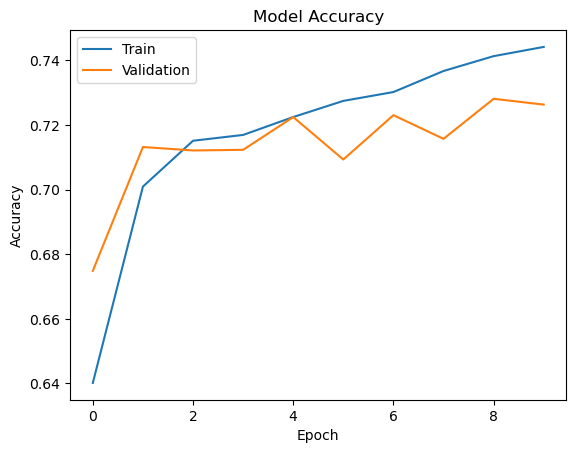

In [6]:
print(history.history.keys())
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

This was the first attempt at getting tuning the model and resulted in an accuracy of ~73.31%. I will now make some adjustments to further improve the model.

# Second attempt at tuning the model

In [8]:
model = Sequential()
model.add(Dense(1024, activation='relu', input_shape=(3072,)))
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu')) # new added layer
model.add(Dense(64, activation='relu')) # new added layer
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()
history = model.fit(x_train, y_train, epochs=100, batch_size=128, validation_split=0.3)
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 1024)              3146752   
                                                                 
 dense_16 (Dense)            (None, 512)               524800    
                                                                 
 dense_17 (Dense)            (None, 256)               131328    
                                                                 
 dense_18 (Dense)            (None, 128)               32896     
                                                                 
 dense_19 (Dense)            (None, 64)                8256      
                                                                 
 dense_20 (Dense)            (None, 1)                 65        
                                                                 
Total params: 3,844,097
Trainable params: 3,844,097
No

Epoch 49/100
274/274 [==============================] - 24s 88ms/step - loss: 0.2825 - accuracy: 0.8780 - val_loss: 0.7411 - val_accuracy: 0.7371
Epoch 50/100
274/274 [==============================] - 25s 91ms/step - loss: 0.2747 - accuracy: 0.8810 - val_loss: 0.7803 - val_accuracy: 0.7360
Epoch 51/100
274/274 [==============================] - 24s 89ms/step - loss: 0.2728 - accuracy: 0.8821 - val_loss: 0.8239 - val_accuracy: 0.7323
Epoch 52/100
274/274 [==============================] - 25s 90ms/step - loss: 0.2641 - accuracy: 0.8862 - val_loss: 0.8099 - val_accuracy: 0.7399
Epoch 53/100
274/274 [==============================] - 24s 89ms/step - loss: 0.2589 - accuracy: 0.8887 - val_loss: 0.8559 - val_accuracy: 0.7352
Epoch 54/100
274/274 [==============================] - 24s 89ms/step - loss: 0.2545 - accuracy: 0.8911 - val_loss: 0.8529 - val_accuracy: 0.7263
Epoch 55/100
274/274 [==============================] - 24s 88ms/step - loss: 0.2468 - accuracy: 0.8937 - val_loss: 0.8347 -

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


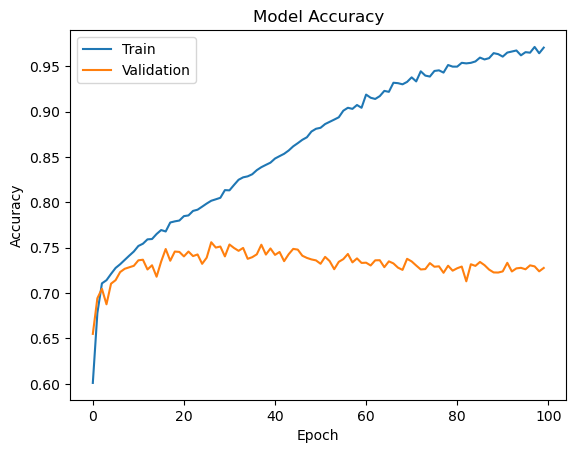

In [9]:
print(history.history.keys())
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

This was the second attempt at getting tuning the model and resulted in an accuracy of ~73.28%. This is a very small improvement and I assume this is an error as the accuracy of the epochs increases from ~50% to ~97.05%. It was done by adding 2 more layers to the network, increasing the batch size and increasing the number of epochs. The increase in epochs increases the time it takes to learn and therefore, increasing the batch size helps reduce the time constraint.